<a href="https://colab.research.google.com/github/dinithprimal/DeepLearning_Tutorials/blob/main/Ex06_SGD_vs_BGD_vs_Mini_BGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
11,2785,4,140.0
9,3700,5,167.0
14,2250,3,101.0
5,1170,2,38.0
1,2600,4,120.0


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):

    y_predicted = np.dot(w, X.T) + b  # w1*area + w2*bedrooms + bias

    w_grad = -(2 / total_samples) * (X.T.dot(y_true - y_predicted))
    b_grad = -(2 / total_samples) * np.sum(y_true - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

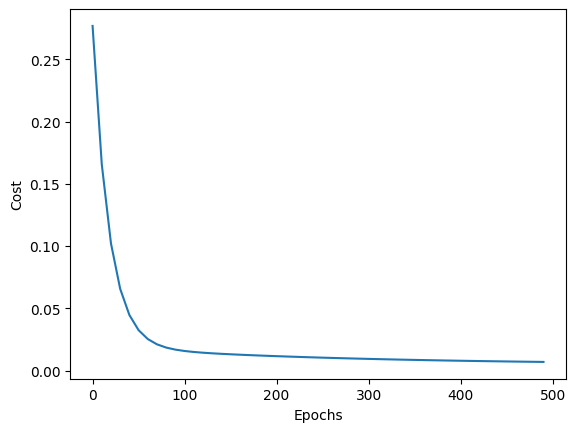

In [6]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list, cost_list)

In [9]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0]

  scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [10]:
predict(1000, 2, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [11]:
predict(1500, 3, w, b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

## Stochastic Gradient Descent

In [25]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples - 1)
    sample_X = X[random_index]
    sample_y = y_true[random_index]

    y_predicted = np.dot(w, sample_X.T) + b

    w_grad = -(2 / total_samples) * (sample_X.T.dot(sample_y - y_predicted))
    b_grad = -(2 / total_samples) * np.sum(sample_y - y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(sample_y - y_predicted))

    if i%100 == 0:
      cost_list.append(cost)
      epoch_list.append(i)


  return w, b, cost, cost_list, epoch_list


w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70913836, 0.67264092]), -0.22985800038971063, 0.0012813929225420483)

In [26]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

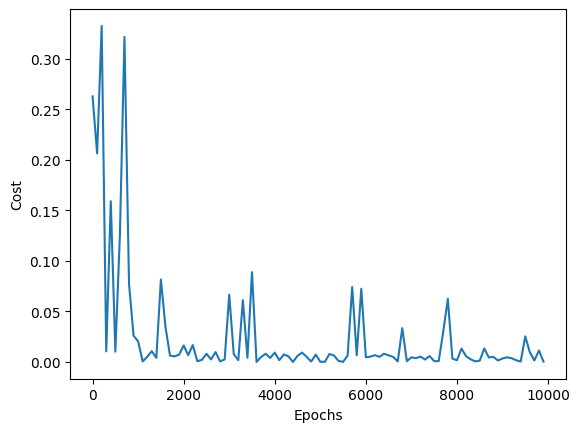

In [27]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [28]:
predict(2600, 4, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.49496705675355

In [29]:
predict(1000, 2, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.273123671054297

In [30]:
predict(1500, 3, w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.48056137931172

## Mini Batch Gradient Descent

In [34]:
def mini_batch_gradient_descent(X, y_true, epochs, batch_size=5, learning_rate = 0.01):

  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  if batch_size > total_samples:
    batch_size = total_samples

  cost_list = []
  epoch_list = []

  num_batches = int(total_samples/batch_size)

  for i in range(epochs):
    random_indices = np.random.permutation(total_samples)
    X_temp = X[random_indices]
    y_temp = y_true[random_indices]

    for j in range(0, total_samples, batch_size):
      Xj = X_temp[j:j+batch_size]
      yj = y_temp[j:j+batch_size]
      y_predicted = np.dot(w, Xj.T) + b

      w_grad = -(2 / len(Xj)) * (Xj.T.dot(yj - y_predicted))
      b_grad = -(2 / len(Xj)) * np.sum(yj - y_predicted)

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      cost = np.mean(np.square(yj - y_predicted))

    if i%10 == 0:
      cost_list.append(cost)
      epoch_list.append(i)


  return w, b, cost, cost_list, epoch_list


w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 120, 5)
w_mbgd, b_mbgd, cost_mbgd

(array([0.71006561, 0.67818464]), -0.23342076783364285, 0.0036072676137879336)

In [35]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

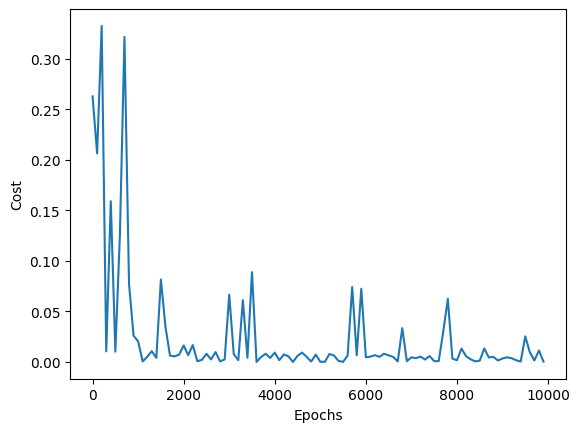

In [36]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [37]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]

In [38]:
predict(2600, 4, w_mbgd, b_mbgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.65299313230213